# Gensim 工具包操作 GloVe 词向量

## GloVe: Global Vectors for Word Representation

GloVe 是和 word2vec 类似的另一种实现 Word Embedding 的算法。   
GloVe 的官网：[GloVe: Global Vectors for Word Representation](https://nlp.stanford.edu/projects/glove/)   
GloVe 官方开源的代码是 C 语言的，我们可以直接下载代码，然后训练我们自己的语料；或者下载官方预先训练好的语料直接使用。

本文示例通过 Gensim 库操作并可视化预训练好的 GloVe 词向量数据。   
预训练好的数据下载地址：[glove.6B.zip](https://nlp.stanford.edu/data/glove.6B.zip)

我们将 GloVe 通过 Gensim 加载并转化为 word2vec 格式。

In [1]:
import numpy as np

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [2]:
# 加载下载的预训练词向量数据
glove_file = datapath('./glove.6B/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [3]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [4]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.927285373210907),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875633478164673),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.751889705657959),
 ('romney', 0.7488929629325867),
 ('kerry', 0.7472623586654663)]

In [5]:
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733936309814),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532904624939),
 ('fruit', 0.6519855260848999),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [6]:
model.most_similar(negative='banana')

[('keyrates', 0.7173938751220703),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720890045166),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434212684631),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905653476715088),
 ('maurilio', 0.6865653395652771)]

In [7]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [8]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [9]:
analogy('japan', 'japanese', 'australia')

'australian'

In [10]:
analogy('australia', 'beer', 'france')

'champagne'

In [11]:
analogy('tall', 'tallest', 'long')

'longest'

In [12]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [13]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


E:\Miniconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


## 可视化

In [14]:
# Get the interactive Tools for Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [15]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(16,16))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

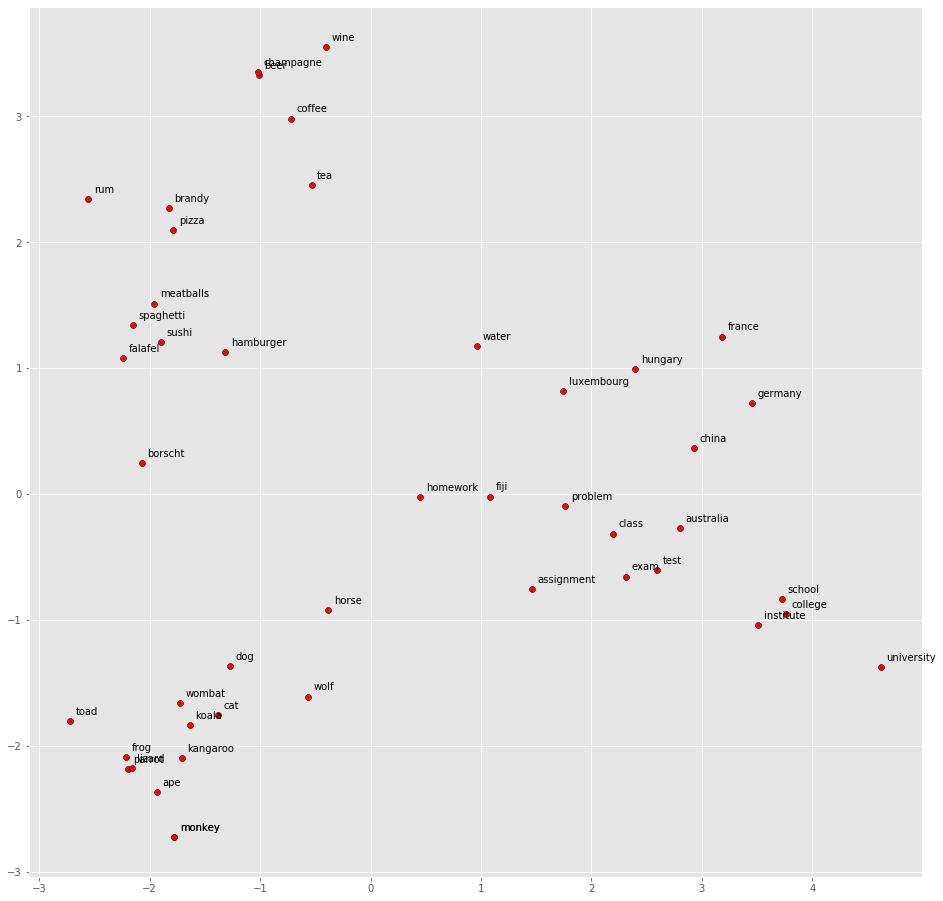

In [16]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

E:\Miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 3364 missing from current font.
  font.load_char(ord(s), flags=flags)


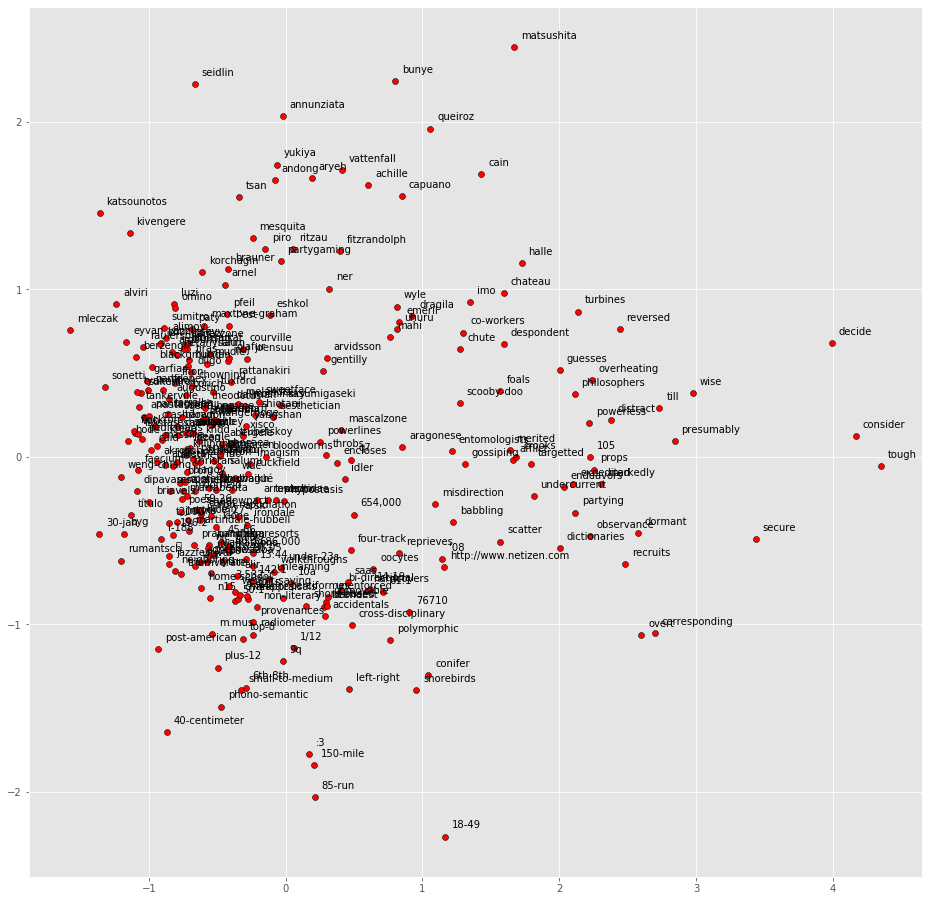

In [17]:
display_pca_scatterplot(model, sample=300)